<a href="https://colab.research.google.com/github/katiko89/Educational-projects/blob/main/%D0%9F%D0%A02_2%2C_%D0%9C%D0%B0%D1%80%D0%BA%D0%B8%D0%BD%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Программирование на языке Python.

Преподаватель: Горохов Олег Евгеньевич.

e-mail: gorokhov-oe@cs.msu.ru




# Практическая работа № 2. Исследование моделей регрессии. Sklearn. Вариант 2. Прогнозирование числа прослушиваний песен.

В рамках данной практической работы мы предлагаем вам самостоятельно решить задачу регрессии и предсказать число прослушиваний (стримов) трека в Spotify на основании полезной информации, полученной из различных площадок (Spotify, Apple Music, Deezer и Shazam).

Полное описание набора данных приводится на сайте [Kaggle](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023).

На сайте можно найти карту данных (Data Card) с описанием признаков. Также можно посмотреть примеры кода, который использовался для решения различных задач анализа данных (вкладка Code) и обсуждение набора данных (Discussion).

Вам нужно будет предсказать значение колонки `streams`.

## 1. Считывание данных

Скачайте тренировочные данные (признаки и метки) и сохраните их в Google Colab в файл с именами `train_features.csv` и `train_labels.csv`:

In [ ]:
# Этот код менять не нужно. Его достаточно просто запустить!
!wget -O "train_features.csv" "https://raw.githubusercontent.com/legas377/TestRepository/main/spotify_train_features.csv"
!wget -O "train_labels.csv" "https://raw.githubusercontent.com/legas377/TestRepository/main/spotify_train_labels.csv"

--2023-11-26 18:31:07--  https://raw.githubusercontent.com/legas377/TestRepository/main/spotify_train_features.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70516 (69K) [text/plain]
Saving to: ‘train_features.csv’

train_features.csv  100%[===================>]  68.86K  --.-KB/s    in 0.02s   

2023-11-26 18:31:07 (3.24 MB/s) - ‘train_features.csv’ saved [70516/70516]

--2023-11-26 18:31:07--  https://raw.githubusercontent.com/legas377/TestRepository/main/spotify_train_labels.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Lengt

Аналогично скачайте тестовые данные. По ним нам неизвестны значения целевой переменной. Нам известны только признаки. Скачаем их и сохраним в файле `test_features.csv`:

In [ ]:
# Этот код менять не нужно. Его достаточно просто запустить!
!wget -O "test_features.csv" "https://raw.githubusercontent.com/legas377/TestRepository/main/spotify_test_features.csv"

--2023-11-26 18:31:10--  https://raw.githubusercontent.com/legas377/TestRepository/main/spotify_test_features.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30148 (29K) [text/plain]
Saving to: ‘test_features.csv’

test_features.csv   100%[===================>]  29.44K  --.-KB/s    in 0.002s  

2023-11-26 18:31:10 (12.1 MB/s) - ‘test_features.csv’ saved [30148/30148]



Импортируйте библиотеку `pandas` под именем `pd`:

In [ ]:
import pandas as pd

Считаем признаки для тренировочной выборки из файла с именем `train_features.csv` в датафрейм с именем `X_train` (с помощью `pd.read_csv()`):

In [ ]:
X_train = pd.read_csv('train_features.csv', index_col=0, encoding='ISO-8859-1', header=0, thousands=',')

Аналогично скачаем значения целевой переменной и сохраним их в объекте с именем `y`:

In [ ]:
y_train = pd.read_csv('train_labels.csv', index_col=0, encoding='ISO-8859-1', header=0, thousands=',')

Аналогично сохраним признаки для тестовой выборки в переменной `X_test`:

In [ ]:
X_test = pd.read_csv('test_features.csv', index_col=0, encoding='ISO-8859-1', header=0, thousands=',')

## 2. Знакомство с данными

Давайте познакомимся с данными, выведя по 5 строк для тренировочной и тестовой выборки:

In [ ]:
X_train.head(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
316,You Proof,Morgan Wallen,1,2022,5,13,2128,9,37,88,...,120,A,Major,73,64,85,25,0,61,3
695,Adore You,Harry Styles,1,2019,12,6,13454,1,246,71,...,99,G#,Major,68,57,77,2,0,10,5
212,Piï¿½ï¿½man Deï¿,"Semicenk, Doï¿½ï¿½u",2,2023,6,2,185,3,5,6,...,98,A#,Minor,73,45,62,28,0,13,13
79,CORAZï¿½ï¿½N VA,Maria Becerra,1,2023,6,22,370,20,12,16,...,98,C#,Major,68,40,79,33,0,30,6
148,Those Eyes,New West,1,2019,5,10,1507,14,24,71,...,120,E,Major,60,24,35,73,0,31,3


In [ ]:
X_test.head(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
199,Take On Me,a-ha,1,1984,10,19,44927,17,34,0,...,84,F#,Minor,57,86,90,2,0,9,5
420,Rumble,"Skrillex, Flowdan, Fred again..",3,2022,1,17,2849,0,39,45,...,140,C#,Minor,81,6,84,5,23,6,6
694,NEW MAGIC WAND,"Tyler, The Creator",2,2019,5,16,4708,0,13,7,...,140,F,Minor,62,46,73,10,0,67,11
750,Falling,Harry Styles,1,2019,12,13,7556,0,124,24,...,110,E,Major,57,6,27,84,0,9,3
507,Pepas,Farruko,1,2021,6,24,14114,17,252,109,...,130,G,Major,76,44,77,1,0,13,3


Обратите внимание на то, что в некоторых колонках названия треков и артистов от ображаются не совсем корректно. Это связано с тем, что названия указаны на языке исполнителя. Такие тексты могут отображаться некорректно. В принципе, можно работать и с такими некорретными названиями как с обычными строками.

Теперь посмотрим на значения целевой переменной для тренировочной выборки:

In [ ]:
y_train = y_train['streams']
y_train

316     367814306
695    1439191367
212      43522589
79       43857627
148     411747614
          ...    
106    1605224506
270     185240616
860     184807630
435     181831132
102     172825906
Name: streams, Length: 667, dtype: object

Обратите внимание, что тип колонки был распознан как object. Подумайте, почему это произошло и в ячейке ниже приведите значение целевой переменной к числовому виду:

In [ ]:
y_train.unique()

array(['367814306', '1439191367', '43522589', '43857627', '411747614',
       '42485571', '1929770265', '77377503', '1802514301', '80758350',
       '721975598', '267758538', '167076418', '184308753', '141381703',
       '918915401', '1735441776', '154863153', '614555082', '838586769',
       '116599790', '1788326445', '601863821', '56533272', '203436468',
       '137070925', '157058870', '887906111', '307370144', '1302184087',
       '187703102', '39578178', '304118600', '430977451', '117206995',
       '909001996', '11599388', '37307967', '109276132', '1591223784',
       '429829812', '582981380', '30343206', '1056760045', '236872197',
       '1661187319', '462791599', '2594040133', '1840364617', '725980112',
       '355219175', '1159176109', '2282771485', '246376690', '147538971',
       '32761689', '611700552', '197643795', '115010040', '127026613',
       '428685680', '663832097', '284819874', '112436403', '331511413',
       '47956378', '2808096550', '1127468248', '838079900', '1

Видим, что есть строка, не являющаяся числом. Заметим, что она содержит значения признаков. Вероятно, в тренировочной выборке есть пропуск данных, которые можно было бы заполнить этой строкой. Рассмотрим соответствующую этой строке строку X_train.

In [ ]:
#эта строка намного длиннее остальных, значит, она максимальная из значений, не приведённых к числовому значению
print(y_train.loc[y_train==max(y_train.unique())])
X_train.loc[y_train[y_train==max(y_train.unique())].index]

574    BPM110KeyAModeMajorDanceability53Valence75Ener...
Name: streams, dtype: object


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,1,1970,1,1,2877,0,16,0,...,110,A,Major,53,75,69,7,0,17,3


Пропусков в строке нет, данные по признакам совпадают с данными в аномальной строке y_train. Осталось заменить эту строку в y_train. Заменим его медианным значением (мы могли бы просто удалить эту строку, но у нас не так много тренировочной выборки, чтобы так делать)

In [ ]:
y_median=int(y_train.loc[y_train != max(y_train.unique())].astype(int).median())
y_train.loc[y_train==max(y_train.unique())]=y_median
y_train=y_train.astype(int)
y_train

316     367814306
695    1439191367
212      43522589
79       43857627
148     411747614
          ...    
106    1605224506
270     185240616
860     184807630
435     181831132
102     172825906
Name: streams, Length: 667, dtype: int64

Далее, до пункта 9 мы будем работать **только с тренировочной выборкой**, считая, что тестовая выборка нам неизвестна. В пункте 9 мы будем применять все алгоритмы, обученные в дальнейших пунктах.

## 3. Знакомство с признаками

Постройте описание признаков. Здесь можно пользоваться любыми знаниями и материалами. Можно использовать информацию из описания данных и примеров кода на [странице набора на сайте Kaggle](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023/data). В этом случае обязательно укажите ссылки на используемые материалы.

In [ ]:
print(X_train.nunique())

track_name              664
artist(s)_name          477
artist_count              8
released_year            46
released_month           12
released_day             31
in_spotify_playlists    632
in_spotify_charts        77
in_apple_playlists      199
in_apple_charts         159
in_deezer_playlists     282
in_deezer_charts         32
in_shazam_charts        152
bpm                     118
key                      11
mode                      2
danceability_%           69
valence_%                92
energy_%                 79
acousticness_%           95
instrumentalness_%       31
liveness_%               63
speechiness_%            45
dtype: int64


***В этой ячейке вставьте описания признаков с указанием их типа и обоснованием выбора. Дополнительно можно использовать любую визуализацию признаков (можно ниже добавлять любое количество ячеек с кодом) и любые материалы (при этом обязательно указывать ссылки на используемые источники).***

Название песни уникально для каждой позиции, а любые совпадения случайны\
Количество уникальных значений признака artist(s)_name слишком велико, чтобы считать его категориальным признаком, но известно, что есть коллективные записи. Проверим, сколько всего уникальных артистов

In [ ]:
artists=set()
list=X_train['artist(s)_name'].to_list()
for char in list:
  char=char.split(sep=', ')
  artists=artists.union(set(char))
print(len(artists))

523


Видим, что количество уникальных артистов даже больше, чем уникаьных значений artist(s)_name, то есть этот признак нельзя считать категориальным

Рассмотрим самых часто встречающихся артистов:

<Axes: >

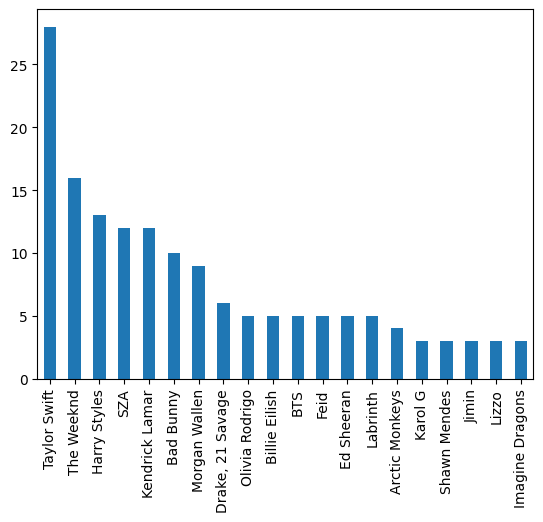

In [ ]:
X_train['artist(s)_name'].value_counts().head(20).plot.bar()

Даже самый часто встречающийся артист встречается малое количество раз по сравнению со всей выборкой, так что признак можно считать не влияющим на целевую переменную.

**Количество артистов, принявших участие в песне**.\
 Это категориальный признак, так как мало значений. Видим, что больше, чем в половине случаев один исполнитель, при этом более 3 исполнителей почти никогда не встречается

<Axes: >

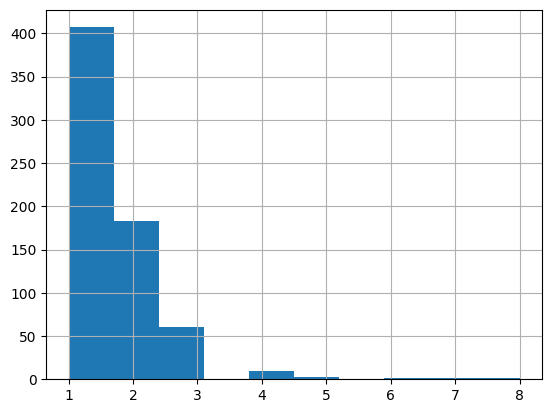

In [ ]:
X_train['artist_count'].hist()

**Released_year** -- категориальный признак, так как немного значений.

<Axes: >

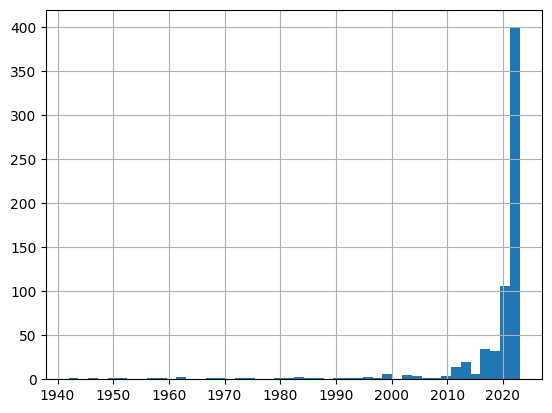

In [ ]:
X_train['released_year'].hist(bins=46)

В выборке участвуют в основном песни, вышедшие в 2020 году и позже, при этом максимальное количество песен, вышедших в 2023

<Axes: >

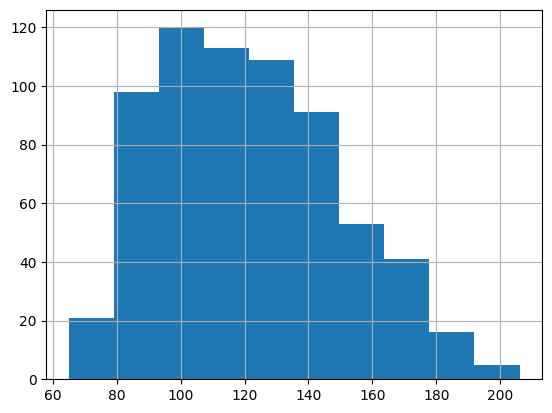

In [ ]:
#гистограмма признака bpm
X_train['bpm'].hist()



---


Признаки key, mode, danceability_%, valence_%, energy_%, acousticness_%, instrumentalness_%, liveness_%, speechiness_% можно считать категориальными, так как они все принимают значения из конечного множества значений, при этом в несколько раз меньшего, чем вся выборка:

danceability_%, valence_%, energy_%, acousticness_%, instrumentalness_%, liveness_%, speechiness_% - целый процент, то есть целое от 1 до 100 \
mode - major, minor, следовательно, это бинарный признак \
key - всего 11 уникальных значений

Признаки _charts_, _playlists_ так же можно считать категориальными, так как они принимают конечное количество значений (много меньшее, чем количество песен в мире, например), в отличие от целевой переменной. С другой стороны, с ними удобнее работать как с непрерывными, так что будем считать их именно такими



---



## 4. Отбор признаков.

В используемом наборе данных присутствует много признаков. Но необязательно все будут влиять на целевую переменную. Подумайте, какие признаки в исходном наборе данных следует оставить для обучения модели.

Можно использовать любые доступные знания (дисперсионный, корелляционный анализ, материалы с Kaggle).

Обратите внимание, что мы пользуемся **только тренировочной выборкой**. Тестовая выборка считается неизвестной нам.

***В этой ячейке укажите, какие признаки вы решили оставить и почему. Можно пользоваться любыми материалами и знаниями. Можно добавлять любое количество ячеек с кодом и текстом. При использовании сторонних ресурсов нужно указать ссылки на используемые источники.***



---
Оставим признаки, показывающие количество плейлистов и чартов на разных платформах, в которых появляется трек (признаки in__charts,	in__playlists). \
Частота появления того или иного значения признаков artist_count, bpm, key, danceability_%, valence_%, energy_%, acousticness_%, instrumentalness_%, liveness_%, speechiness_% скорее зависит от того, насколько часто записывают треки с этим значением (так, bpm чаще всего в пределах от 60 до 240, из гистограммы признака для выборки видно, что он как раз в этих пределах), поэтому эти признаки будем считать не влияющими на целевую переменную. \
Название трека и имя артиста (артистов) не влияют на значение целевой переменной, так как они почти что уникальны (безусловно, есть артисты, треки которых более популярны, но выборка показывает, что даже у самого популярного артиста треков в выборке много меньше, чем общее количество треков). released_year, released_month, released_day очевидно не влияют на количество прослушиваний песни.


---





In [ ]:
#для примера посмотрим влияние key, bpm, dancebility_% на целевую переменную
from scipy.stats import f_oneway

Xy_train=X_train
Xy_train['streams']=y_train

pair_bpm=Xy_train[['bpm', 'streams']]
print('корреляция bpm \n', pair_bpm.corr(), '\n')

pair_danceability=Xy_train[['danceability_%', 'streams']]
print('корреляция danceability_% \n', pair_danceability.corr(), '\n')

key_lst = []
for char in Xy_train['key'].value_counts().index:
  key_val=Xy_train.loc[Xy_train['key']==char]['streams']
  key_val=key_val.dropna()
  key_lst.append(key_val)

print('key -', f_oneway(*key_lst))

корреляция bpm 
               bpm   streams
bpm      1.000000 -0.020669
streams -0.020669  1.000000 

корреляция danceability_% 
                 danceability_%   streams
danceability_%        1.000000 -0.091025
streams              -0.091025  1.000000 

key - F_onewayResult(statistic=0.6935508235736403, pvalue=0.7309357974478017)


Видим, что эти признаки действительно не влияют на целевую переменную.

Напротив, отобранные признаки влияют на целевую переменную (pvalue << 0.05):

In [ ]:
#для примера посмотрим на признак in_spotify_playlists, in_spotify_charts

_lst = []
for char in Xy_train['in_spotify_playlists'].value_counts().index:
  _val=Xy_train.loc[Xy_train['in_spotify_playlists']==char]['streams']
  _val=_val.dropna()
  _lst.append(_val)

chart_lst = []
for char in Xy_train['in_spotify_playlists'].value_counts().index:
  chart_val=Xy_train.loc[Xy_train['in_spotify_playlists']==char]['streams']
  chart_val=chart_val.dropna()
  chart_lst.append(chart_val)

print('in_spotify_playlists -', f_oneway(*_lst))
print('in_spotify_charts -', f_oneway(*chart_lst))

in_spotify_playlists - F_onewayResult(statistic=8.76262736650903, pvalue=2.605708258810674e-11)
in_spotify_charts - F_onewayResult(statistic=8.76262736650903, pvalue=2.605708258810674e-11)


В ячейке ниже выполните отбор признаков, сохранив в переменную `X_train` только те столбцы, которые вы отобрали:

In [ ]:
X_train=X_train[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts',
                 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']]
X_train

#тут заметила, что в некоторх столбцах тысячи считались с ','
#переписала в самом начале считывание файла, чтобы не менять отдельно в каждой колонке...
#нужны ведь целые значения всё-таки, а не строки

,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts
316,2128,9,37,88,9,0,14.0
695,13454,1,246,71,519,2,5.0
212,185,3,5,6,4,1,33.0
79,370,20,12,16,18,4,93.0
148,1507,14,24,71,44,1,195.0
...,...,...,...,...,...,...,...
106,21097,52,384,135,1034,37,312.0
270,1282,6,26,6,19,0,5.0
860,220,4,16,5,0,0,6.0
435,713,7,2,4,6,0,0.0


## 5. Очистка данных и заполнение пропусков.

Определите, в каких из отобранных признаков присутствуют пропуски. Предложите свой способ заполнения пропусков в данных.

Еще раз обращаем внимание, что пока мы работаем **только с тренировочной выборкой**. Тестовая выборка будет обрабатываться в пункте 9.

In [ ]:
X_train.isna().any()

in_spotify_playlists    False
in_spotify_charts       False
in_apple_playlists      False
in_apple_charts         False
in_deezer_playlists     False
in_deezer_charts        False
in_shazam_charts         True
dtype: bool

Пропусков виде Nan почти нет, но посмотрим, есть ли неправильные данные, пропуки в виде -, ? и тп.

In [ ]:
X_train['in_spotify_playlists']

316     2128
695    13454
212      185
79       370
148     1507
       ...  
106    21097
270     1282
860      220
435      713
102     2528
Name: in_spotify_playlists, Length: 667, dtype: int64

In [ ]:
X_train['in_spotify_charts']

316     9
695     1
212     3
79     20
148    14
       ..
106    52
270     6
860     4
435     7
102    39
Name: in_spotify_charts, Length: 667, dtype: int64

In [ ]:
X_train['in_apple_playlists']

316     37
695    246
212      5
79      12
148     24
      ... 
106    384
270     26
860     16
435      2
102     56
Name: in_apple_playlists, Length: 667, dtype: int64

In [ ]:
X_train['in_apple_charts']

316     88
695     71
212      6
79      16
148     71
      ... 
106    135
270      6
860      5
435      4
102     91
Name: in_apple_charts, Length: 667, dtype: int64

In [ ]:
X_train['in_deezer_playlists']

316       9
695     519
212       4
79       18
148      44
       ... 
106    1034
270      19
860       0
435       6
102      59
Name: in_deezer_playlists, Length: 667, dtype: int64

In [ ]:
X_train['in_deezer_charts']

316     0
695     2
212     1
79      4
148     1
       ..
106    37
270     0
860     0
435     0
102     3
Name: in_deezer_charts, Length: 667, dtype: int64

In [ ]:
X_train['in_shazam_charts']

316     14.0
695      5.0
212     33.0
79      93.0
148    195.0
       ...  
106    312.0
270      5.0
860      6.0
435      0.0
102    486.0
Name: in_shazam_charts, Length: 667, dtype: float64


---

Данные корректны, нет строковых значений в числовых признаках \
Пропуски есть только в признаке in_shazam_charts. Заполним пропуски медианным значением признака для выборки

В ячейке ниже приведите нужное заполнение признаков.

Обратите внимание, что мы предполагаем, что нам неизвестна никакая информация по тестовой выборке! Т.е. при заполнении признаков можно пользоваться **только обучающей выборкой**. Например, средние значения и самые частые значения нужно вычислять **только на тренировочной выборке**. К тестовой выборке мы должны только **применять нужные преобразования** (например, заполнять пропуски только средним по тренировочной выборке, не по тестовой!). Применение обученных моделей к тестовой выборке будет выполняться далее (см. пункт 9).

In [ ]:
shazam_charts_mean=int(X_train['in_shazam_charts'].loc[(X_train['in_shazam_charts'].isna() != True)].mean())
X_train['in_shazam_charts']=X_train['in_shazam_charts'].fillna(shazam_charts_mean).astype(int)
print(X_train['in_shazam_charts'])
X_train['in_shazam_charts'].isna().any()

316     14
695      5
212     33
79      93
148    195
      ... 
106    312
270      5
860      6
435      0
102    486
Name: in_shazam_charts, Length: 667, dtype: int64


<ipython-input-30-737fc00a19f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['in_shazam_charts']=X_train['in_shazam_charts'].fillna(shazam_charts_mean).astype(int)


False

## 6. Построение новых признаков.

Подумайте, какие новые признаки можно получить из исходного набора данных.

Можно создавать любые признаки, которые могут вычисляться с помощью любой функции `f(X_train)` (например, можно вычислять квадраты отдельных признаков или любые другие преобразования). Также нужно векторизовать текстовые признаки.

**Обратите внимание** на 2 момента:

1. Любые алгоритмы создания признаков можно обучать (подбирать параметры) **только** на тренировочной выборке. К тестовой выборке нужно только **применять** обученные алгоритмы (например, polyfit нужно обучать на тренировочной, а к тестовой только применять. То же самое с векторизацией текстов. Мы строим словарь токенов **только** по тренировочной выборке, а к тестовой применяем - но нужно подумать, как поступать в случае, когда в тестовой выборке встречаются токены, которых не было в тренировочной выборке. В простом случае можно заменять такие неизвестные токены в тестовой выборке на самый частый токен. За доп. баллы можно дополнительно изучить документацию к TFIDFVectorizer и понять, как обрабатываются такие ситуации). Применение обученных алгоритмов к тестовой выборке будет выполняться далее, в пункте 9. Пока нужно только обучить и применить алгоритмы обработки на тренировочной выборке.

2. Число признаков не должно превышать или быть близким к размеру тренировочной выборки! Иначе модель не обучится...




---
Можем добавить такие признаки: \
1) среднее между energy_% и danceability_% (назовём его "клубностью" , так как в клубах танцуют под более энергичную музыку, вероятно... clubbing_%) \
2) среднее между acousticness_%, liveness_% (приближенность к жизни proximaty_to_life_%)








In [ ]:
X_train_copy = pd.read_csv('train_features.csv', index_col=0, encoding='ISO-8859-1', header=0, thousands=',')
new_1=['energy_%', 'danceability_%']
new_2=['acousticness_%', 'liveness_%']
X_train_1=X_train_copy[new_1]
X_train_2=X_train_copy[new_2]
X_train_1=pd.DataFrame(X_train_1.mean(axis=1).astype(int), columns=['clubbing_%'])
X_train_2=pd.DataFrame(X_train_2.mean(axis=1).astype(int), columns=['poximaty_to_life_%'])
X_train_add=pd.concat([X_train, X_train_1, X_train_2], axis=1)
X_train_add

,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts,clubbing_%,poximaty_to_life_%
316,2128,9,37,88,9,0,14,79,43
695,13454,1,246,71,519,2,5,72,6
212,185,3,5,6,4,1,33,67,20
79,370,20,12,16,18,4,93,73,31
148,1507,14,24,71,44,1,195,47,52
...,...,...,...,...,...,...,...,...,...
106,21097,52,384,135,1034,37,312,80,7
270,1282,6,26,6,19,0,5,59,42
860,220,4,16,5,0,0,6,44,46
435,713,7,2,4,6,0,0,56,21


## 7. Выбор моделей регрессии.

Подумайте, какие модели регрессии можно применить для решения поставленной задачи.

Необходимо рассмотреть модели из семинаров и лекций, также можно пользоваться любыми другими моделями, доступными в `sklearn` (за это будут доп. баллы).

## 8. Отбор моделей.

Произведите отбор моделей, показывающих лучший результат на тренировочной выборке.

Для отбора моделей используйте кросс-валидацию с вычислением усредненного значения R^2. Параметры кросс-валидации подберите самостоятельно.

**Дополнительно** можно использовать Pipeline, за который будут начисляться бонусные баллы.



1.   **Linear regression, PolynomialFeatures**



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize, QuantileTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor

lin_reg=LinearRegression()
poly=PolynomialFeatures()

pipe_1 = Pipeline(steps=[("poly", poly), ('lin_reg', lin_reg)])

param_grid_1={
    "poly__degree": [1,2,3,4,5]
}

search_1 = GridSearchCV(pipe_1, param_grid_1, cv=3, scoring='r2')
search_1.fit(X_train, y_train)
print("R2 исходного:", search_1.best_score_)
print('Лучший параметр:', search_1.best_params_)

search_1 = GridSearchCV(pipe_1, param_grid_1, cv=3, scoring='r2')
search_1.fit(X_train, y_train)
print("R2 для X_train:", search_1.best_score_)
print('Лучший параметр для X_train:', search_1.best_params_)

search_1.fit(X_train_add, y_train)
print("R2 для X_train_add:", search_1.best_score_)
print('Лучший параметр для X_train_add:', search_1.best_params_)

R2 исходного: 0.709213519289342
Лучший параметр: {'poly__degree': 1}
R2 для X_train: 0.709213519289342
Лучший параметр для X_train: {'poly__degree': 1}
R2 для X_train_add: 0.7128091364543024
Лучший параметр для X_train_add: {'poly__degree': 1}




2.  **LinearRegression, scaler**



In [ ]:
sc=StandardScaler()

pipe_2=Pipeline(steps=[('sc', sc ), ('lin_reg', lin_reg)])
param_grid_2={
    'lin_reg__fit_intercept':[True, False]
}

search_2 = GridSearchCV(pipe_2, param_grid_2, cv=3, scoring='r2')
search_2.fit(X_train, y_train)
print("R2 для X_train:", search_2.best_score_)
print('Лучший параметр для X_train:', search_2.best_params_)

search_2 = GridSearchCV(pipe_2, param_grid_2, cv=3, scoring='r2')
search_2.fit(X_train, y_train)
print("R2 для X_train:", search_2.best_score_)
print('Лучший параметр для X_train:', search_2.best_params_)

search_2.fit(X_train_add, y_train)
print("R2 для X_train_add:", search_2.best_score_)
print('Лучший параметр для X_train_add:', search_2.best_params_)

R2 для X_train: 0.709213519289342
Лучший параметр для X_train: {'lin_reg__fit_intercept': True}
R2 для X_train: 0.709213519289342
Лучший параметр для X_train: {'lin_reg__fit_intercept': True}
R2 для X_train_add: 0.7128091364543024
Лучший параметр для X_train_add: {'lin_reg__fit_intercept': True}




3.   **LinearRegression, quantiles**



In [ ]:
qt=QuantileTransformer()

pipe_3=Pipeline(steps=[('qt', qt), ('lin_reg', lin_reg)])
param_grid_3={
    'qt__n_quantiles': [5,10,20,40,100],
    'qt__random_state':[20],
    'lin_reg__fit_intercept':[True, False]
}

search_3 = GridSearchCV(pipe_3, param_grid_3, cv=3, scoring='r2')
search_3.fit(X_train, y_train)
print("R2 для X_train:", search_3.best_score_)
print('Лучший параметр для X_train:', search_3.best_params_)
#значения для выборки с добавленными данными
search_3.fit(X_train_add, y_train)
print("R2 для X_trainadd_:", search_3.best_score_)
print('Лучший параметр для X_train_add:', search_3.best_params_)

R2 для X_train: 0.6013345746029226
Лучший параметр для X_train: {'lin_reg__fit_intercept': True, 'qt__n_quantiles': 100, 'qt__random_state': 20}
R2 для X_trainadd_: 0.600646174519273
Лучший параметр для X_train_add: {'lin_reg__fit_intercept': True, 'qt__n_quantiles': 100, 'qt__random_state': 20}




4.  **KNN, quantile**



In [ ]:
knn=KNeighborsRegressor()

pipe_4=Pipeline(steps=[('qt', qt), ('knn', knn)])
param_grid_4={
    'qt__n_quantiles': [5,10,20,30,40],
    'knn__n_neighbors':[1,2,3,5,10,15,20,25],
    'knn__metric':['euclidean', 'manhattan', 'cosine' ]
}

search_4 = GridSearchCV(pipe_4, param_grid_4, cv=3, scoring='r2')
search_4.fit(X_train, y_train)
print("R2 для X_train:", search_4.best_score_)
print('Лучший параметр для X_train:', search_4.best_params_)

search_4.fit(X_train_add, y_train)
print("R2 для X_train_add:", search_4.best_score_)
print('Лучший параметр для X_train_add:', search_4.best_params_)

R2 для X_train: 0.7508870491465979
Лучший параметр для X_train: {'knn__metric': 'manhattan', 'knn__n_neighbors': 3, 'qt__n_quantiles': 40}
R2 для X_train_add: 0.7303081318898362
Лучший параметр для X_train_add: {'knn__metric': 'manhattan', 'knn__n_neighbors': 5, 'qt__n_quantiles': 20}




5. KNN  



In [ ]:
pipe_5=Pipeline(steps=[('knn', knn)])
param_grid_5={
    'knn__n_neighbors':[1,2,3,5,10,15,20,25],
    'knn__metric':['euclidean', 'manhattan', 'cosine' ]
}

search_5 = GridSearchCV(pipe_5, param_grid_5, cv=3, scoring='r2')
search_5.fit(X_train, y_train)
print("R2 для X_train:", search_5.best_score_)
print('Лучший параметр для X_train:', search_5.best_params_)

search_5.fit(X_train_add, y_train)
print("R2 для X_train_add:", search_5.best_score_)
print('Лучший параметр для X_train_add:', search_5.best_params_)

R2 для X_train: 0.7206749971019031
Лучший параметр для X_train: {'knn__metric': 'manhattan', 'knn__n_neighbors': 5}
R2 для X_train_add: 0.7218999734590689
Лучший параметр для X_train_add: {'knn__metric': 'manhattan', 'knn__n_neighbors': 5}




---
Выше рассмотрены модели с семинаров. Рассмотрим ещё несколько моделей с https://scikit-learn.org/stable/modules/linear_model.html#



---





6. **Lasso**



In [ ]:
from sklearn.linear_model import Lasso

lasso=Lasso()

pipe_6=Pipeline(steps=[('lasso', lasso)])
param_grid_6={
    'lasso__alpha':[1, 2, 5, 10, 15, 20]
}

search_6 = GridSearchCV(pipe_6, param_grid_6, cv=3, scoring='r2')
search_6.fit(X_train, y_train)
print("R2 для X_train:", search_6.best_score_)
print('Лучший параметр для X_train:', search_6.best_params_)

search_6.fit(X_train_add, y_train)
print("R2 для X_train_add:", search_6.best_score_)
print('Лучший параметр для X_train_add:', search_6.best_params_)

R2 для X_train: 0.7092135195679526
Лучший параметр для X_train: {'lasso__alpha': 20}
R2 для X_train_add: 0.7128091367083219
Лучший параметр для X_train_add: {'lasso__alpha': 20}


In [ ]:
pipe_6=Pipeline(steps=[('qt', qt),('lasso', lasso)])
param_grid_6={
    'qt__n_quantiles': [5,10,20,30,40],
    'lasso__alpha':[1, 2, 5, 10, 15, 20]
}

search_6 = GridSearchCV(pipe_6, param_grid_6, cv=3, scoring='r2')
search_6.fit(X_train, y_train)
print("R2 для X_train:", search_6.best_score_)
print('Лучший параметр для X_train:', search_6.best_params_)

search_6.fit(X_train_add, y_train)
print("R2 для X_train_add:", search_6.best_score_)
print('Лучший параметр для X_train_add:', search_6.best_params_)

R2 для X_train: 0.6011230136863016
Лучший параметр для X_train: {'lasso__alpha': 1, 'qt__n_quantiles': 40}
R2 для X_train_add: 0.6002799558315501
Лучший параметр для X_train_add: {'lasso__alpha': 1, 'qt__n_quantiles': 40}


In [ ]:
from sklearn.linear_model import BayesianRidge

br=BayesianRidge()

pipe_7=Pipeline(steps=[('br', br)])
param_grid_7={
    'br__alpha_1':[1e-6, 2e-6, 5e-6],
    'br__alpha_2':[1e-6, 2e-6, 5e-6],
    'br__lambda_1':[1e-6, 2e-6, 5e-6],
    'br__lambda_2':[1e-6, 2e-6, 5e-6]
}

search_7 = GridSearchCV(pipe_7, param_grid_7, cv=3, scoring='r2')
search_7.fit(X_train, y_train)
print("R2 для X_train:", search_7.best_score_)
print('Лучший параметр для X_train:', search_7.best_params_)

search_7.fit(X_train_add, y_train)
print("R2 для X_train_add:", search_7.best_score_)
print('Лучший параметр для X_train_add:', search_7.best_params_)

R2 для X_train: 0.7081302520430987
Лучший параметр для X_train: {'br__alpha_1': 5e-06, 'br__alpha_2': 1e-06, 'br__lambda_1': 1e-06, 'br__lambda_2': 5e-06}
R2 для X_train_add: 0.7123501082518858
Лучший параметр для X_train_add: {'br__alpha_1': 5e-06, 'br__alpha_2': 1e-06, 'br__lambda_1': 1e-06, 'br__lambda_2': 1e-06}


## 9. Применение лучшей модели к тестовой выборке.

Перенесите весь код по применению лучшей модели к данным тестовой выборки `X_test` (включая отбор и используемую обработку признаков, добавление новых признаков и применение обученной модели). Не забывайте указать import-ы всех библиотек и модулей, которые вы используете!

В конце нужно будет выполнить predict для обученной модели на `X_test` (после выполнения всей обработки для тестовой выборки). В результате получится некоторый список `pred`. Его нужно будет отправить в качестве ответа на задание. Далее Яндекс. Контест автоматически сравнит ваши значения с эталонными на основании метрики R^2 и выдаст полученную точность. Нужно постараться достичь наилучшей точности.

Баллы за задание будут выставляться на основании полученной лучшей точности. Необходимо будет достичь определенной точности, которая будет оглашена отдельно после отпарвки всех решений. Также дополнительно будут начисляться баллы за попадание в TOP-1, TOP-3, TOP-5 и TOP-10 по группе. Также полагаются дополнительные баллы за используемые модели (см. пояснения к каждым этапам задания).

In [ ]:
#библиотеки
import pandas as pd
from scipy.stats import f_oneway
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize, QuantileTransformer
from sklearn.neighbors import KNeighborsRegressor

#отбор признаков
X_test=X_test[['in_spotify_playlists', 'in_spotify_charts', 'in_apple_playlists', 'in_apple_charts',
                 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts']]

#для выборки с добавленными признаками модели работают хуже, поэтому не берём добавленные признаки

# заполнение пропусков
for col in X_test.columns:
  if X_test[col].isna().any()==True:
    X_test[col]=X_test[col].fillna(X_train[col].mean())

mdl=Pipeline(steps=[('qt', QuantileTransformer(n_quantiles=40)), ('knn', KNeighborsRegressor(metric='manhattan', n_neighbors=3))])
mdl.fit(X_train, y_train)
mdl.score(X_train, y_train)

0.8601996823754647

Теперь сохраните результаты применения модели в файл `submission_res.npy`:

In [ ]:
# Исправьте код в этой ячейке (если нужно) и запустите его
# mdl - обученная модель (например, LinearRegression или Pipeline)

import numpy as np

y_pred = mdl.predict(X_test)
np.save('submission_res.npy', y_pred)

Теперь скачайте файл `submission_res.npy` из Google Colab (файл можно найти слева, нажав на кнопку папки) и приложите его в качестве ответа на задание в Яндекс. Контест.